#In this project we will analyse and predict, whether a person, who had boared the Titanic has a chance of survival or not, using Machine Learning Logistics Regression Model.


In [95]:
#importing the basic library of python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#Reading the dataset
df=pd.read_csv('/content/tested.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [99]:
#Finding the shape of dataset
df.shape

(418, 12)

Text(0, 0.5, 'Value')

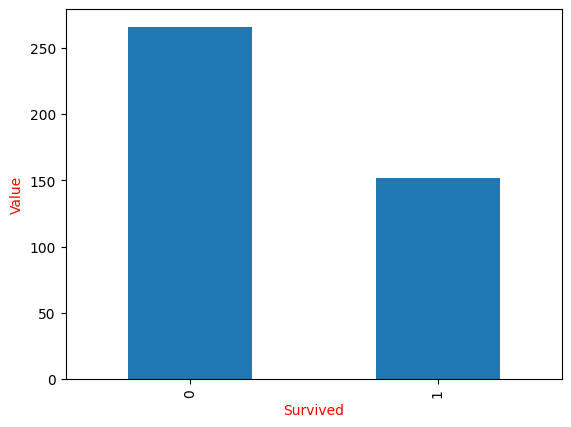

In [100]:
#Plotting the bar graph for survived class
df['Survived'].value_counts().plot.bar()
plt.xlabel('Survived',color='r')
plt.ylabel('Value',color='r')

Text(0, 0.5, 'values')

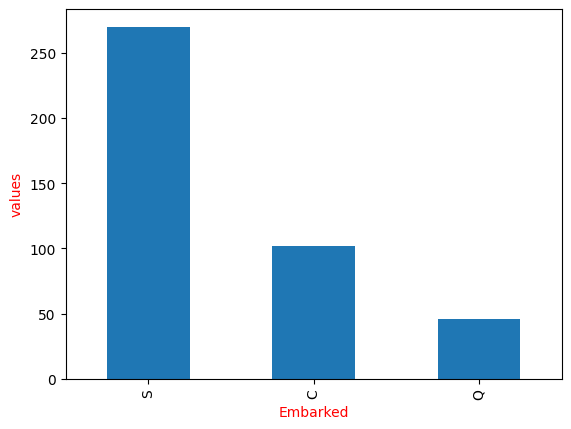

In [104]:
df['Embarked'].value_counts().plot.bar()
plt.xlabel("Embarked",color='r')
plt.ylabel("values",color='r')

In [105]:
#Checking the number of null row for every column
df.isnull().sum()
# We found that Cabin column has highest number of null value in the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [106]:
df['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [107]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [71]:
#Now dropping the cabin column from the dataset because it won't be of much importance
df.drop('Cabin',axis=1,inplace=True)


In [72]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [73]:
#Now filling the null row of age column by mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [74]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [75]:
df.dropna(inplace=True)
df.shape

(417, 11)

In [77]:
#Again checking the null value for each column
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [78]:
#Checking the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


#Encoding

In [79]:
#Converting categorical column to numerical column
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [80]:
encoding={"Sex":{"male":1,"female":0},
          "Embarked":{"Q":0,"S":1,"C":2}}
df.replace(encoding,inplace=True)

In [81]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,1


<ipython-input-89-6d52977c173f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,vmax=+1,vmin=-1)


<Axes: >

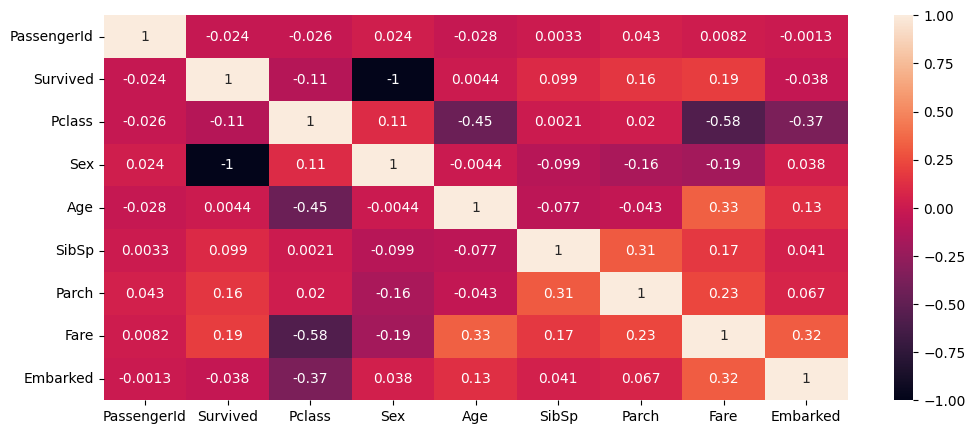

In [89]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,vmax=+1,vmin=-1)

In [33]:
 #Splitting the dataset
x=df.drop(["Name","Ticket","PassengerId","Survived"],axis=1)
y=df["Survived"]

# importing all important algorithm from sklearn library

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler


#Training the model

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
std=StandardScaler()
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)
lr=LogisticRegression(fit_intercept=True,max_iter=30)
lr.fit(x_train_std,y_train)

LogisticRegression(max_iter=30)

In [83]:
y_pred_train=lr.predict(x_train_std)
y_pred_test=lr.predict(x_test_std)

In [84]:
#Checking the accuracy of the model
print(accuracy_score(y_pred_train,y_train))
print(accuracy_score(y_pred_test,y_test))
print(confusion_matrix(y_pred_train,y_train))
print(confusion_matrix(y_pred_test,y_test))
print(classification_report(y_pred_train,y_train))
print(classification_report(y_pred_test,y_test))


1.0
1.0
[[222   0]
 [  0 111]]
[[43  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       1.00      1.00      1.00       111

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        41

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

